In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/effects-of-alcohol-on-student-performance/Stats survey.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/kaggle/input/effects-of-alcohol-on-student-performance/Stats survey.csv')

In [5]:
data.head(10)

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
5,2024/03/07 5:13:18 pm EET,Male,83.0,NaN,Engineering,NaN,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,8+,4+,3-5,3,1,Yes,Yes,Very close
6,2024/03/07 5:13:22 pm EET,Male,80.0,2nd Year,Economic & Management Sciences,54.0,Private accommodation/ stay with family/friends,R 5001 - R 6000,No,8+,2,5-8,1,0,No,Yes,Very close
7,2024/03/07 5:13:26 pm EET,Female,85.0,2nd Year,Arts & Social Sciences,75.0,Private accommodation/ stay with family/friends,R 5001 - R 6000,No,3-5,3,3-5,2,0,Yes,Yes,Very close
8,2024/03/07 5:13:28 pm EET,Male,89.0,NaN,Engineering,NaN,NaN,R 5001 - R 6000,No,8+,Only weekends,3-5,0,NaN,No,Yes,Very close
9,2024/03/07 5:13:35 pm EET,Male,83.0,NaN,Science,NaN,NaN,R 6001 - R 7000,No,3-5,3,5-8,4+,0,No,Yes,Close


In [6]:
data.tail(10)

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
396,2024/03/11 4:41:08 pm EET,Female,78.0,2nd Year,Medicine and Health Services,74.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,Only weekends,1-3,0,0,No,Yes,Very close
397,2024/03/11 5:11:29 pm EET,Male,86.0,1st Year,Economic & Management Sciences,70.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,2,0,Yes,Yes,Fair
398,2024/03/11 5:45:20 pm EET,Female,74.0,2nd Year,Economic & Management Sciences,60.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,5-8,Only weekends,1-3,0,3,No,No,Close
399,2024/03/11 6:06:08 pm EET,Female,NaN,NaN,Engineering,NaN,Private accommodation/ stay with family/friends,NaN,No,3-5,Only weekends,1-3,0,0,No,Yes,Very close
400,2024/03/11 7:41:43 pm EET,Male,85.0,NaN,Arts & Social Sciences,NaN,NaN,R 5001 - R 6000,No,3-5,Only weekends,3-5,0,0,No,Yes,Very close
401,2024/03/12 11:05:33 am EET,Female,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,NaN,No,3-5,3,1-3,0,0,No,Yes,Close
402,2024/03/12 3:26:14 pm EET,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,2024/03/13 10:32:27 pm EET,Male,85.0,NaN,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close
405,2024/03/16 10:30:36 pm EET,Female,80.0,1st Year,NaN,63.0,Private accommodation/ stay with family/friends,R 5001 - R 6000,No,3-5,Only weekends,3-5,1,0,No,No,Close


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

In [8]:
#check missing values

missing_values = data.isnull().sum()

In [9]:
missing_values

Timestamp                                                                                             0
Your Sex?                                                                                             2
Your Matric (grade 12) Average/ GPA (in %)                                                            7
What year were you in last year (2023) ?                                                             73
What faculty does your degree fall under?                                                             7
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   86
Your Accommodation Status Last Year (2023)                                                           23
Monthly Allowance in 2023                                                                            31
Were you on scholarship/bursary in 2023?                                                              8
Additional amount of studying (in hrs) per week                 

In [10]:
# Check Duplicates 

duplicates_rows = data[data.duplicated()]

In [11]:
duplicates_rows

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?


In [12]:
# Remove NaN Values

data = data.dropna()

In [13]:
data

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2024/03/11 4:40:28 pm EET,Male,75.0,2nd Year,Economic & Management Sciences,80.0,Private accommodation/ stay with family/friends,R 8000+,No,0,4+,8+,4+,0,No,No,Very close
396,2024/03/11 4:41:08 pm EET,Female,78.0,2nd Year,Medicine and Health Services,74.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,Only weekends,1-3,0,0,No,Yes,Very close
397,2024/03/11 5:11:29 pm EET,Male,86.0,1st Year,Economic & Management Sciences,70.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,2,0,Yes,Yes,Fair
398,2024/03/11 5:45:20 pm EET,Female,74.0,2nd Year,Economic & Management Sciences,60.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,5-8,Only weekends,1-3,0,3,No,No,Close


In [14]:
data.shape

(295, 17)

In [15]:
data.describe()

,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
count,295.000000,295.000000
mean,78.209593,66.562780
std,6.577461,9.328997
min,60.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,74.000000
max,99.000000,95.220000


# I answered the question based on photos in description page

# The sex/gender of the student.(Categorical)

In [16]:
data.columns

Index(['Timestamp', 'Your Sex?', 'Your Matric (grade 12) Average/ GPA (in %)',
       'What year were you in last year (2023) ?',
       'What faculty does your degree fall under?',
       'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)',
       'Your Accommodation Status Last Year (2023)',
       'Monthly Allowance in 2023', 'Were you on scholarship/bursary in 2023?',
       'Additional amount of studying (in hrs) per week',
       'How often do you go out partying/socialising during the week? ',
       'On a night out, how many alcoholic drinks do you consume?',
       'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
       'How many modules have you failed thus far into your studies?',
       'Are you currently in a romantic relationship?',
       'Do your parents approve alcohol consumption?',
       'How strong is your relationship with your parent/s?'],
      dtype='object')

In [17]:
data['Your Sex?'].value_counts()

Your Sex?
Male      159
Female    136
Name: count, dtype: int64

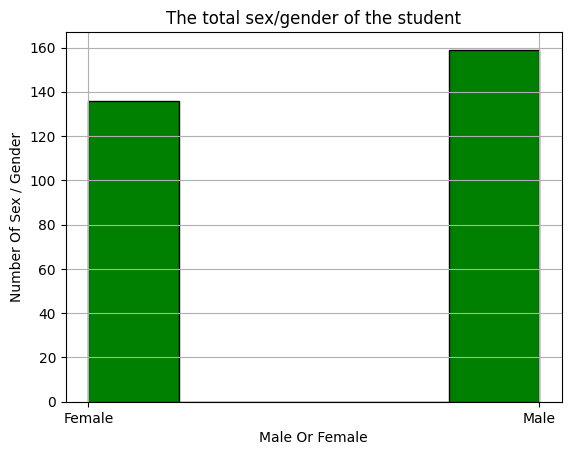

In [20]:
# Plot a histogram for the total sex/gender of the student 

plt.hist(data['Your Sex?'], bins=5, color='green', edgecolor='black')
plt.title('The total sex/gender of the student')
plt.xlabel('Male Or Female')
plt.ylabel('Number Of Sex / Gender')
plt.grid(True)
plt.show()

# The students matric average in percentage.(Numerical, continuous)

In [18]:
data['Your Matric (grade 12) Average/ GPA (in %)'] = data['Your Matric (grade 12) Average/ GPA (in %)'].astype(float)
data['Your Matric (grade 12) Average/ GPA (in %)'].mean()

78.20959322033899

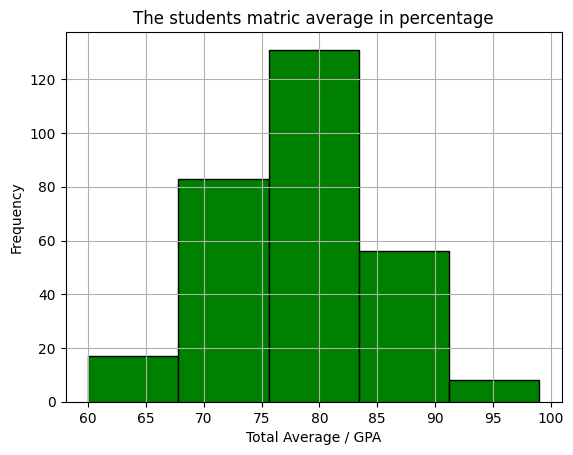

In [22]:
# Plot a histogram for the students matric average in percentage

plt.hist(data['Your Matric (grade 12) Average/ GPA (in %)'], bins=5, color='green', edgecolor='black')
plt.title('The students matric average in percentage')
plt.xlabel('Total Average / GPA')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# The student's current year of academic studies.

In [24]:
data['What year were you in last year (2023) ?'].value_counts()

What year were you in last year (2023) ?
2nd Year        139
1st Year        109
3rd Year         36
4th Year          6
Postgraduate      5
Name: count, dtype: int64

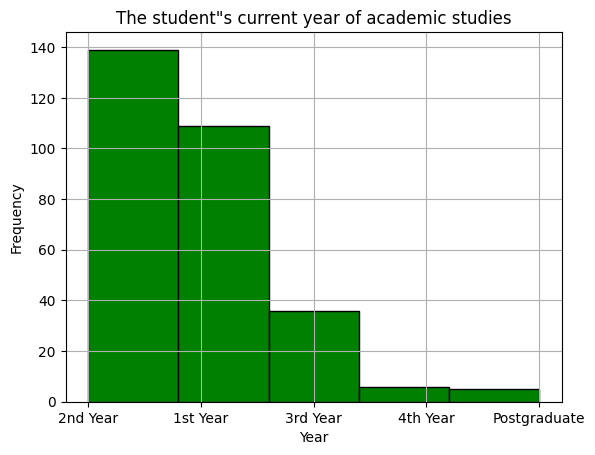

In [23]:
# Plot a histogram for the student's current year of academic studies

plt.hist(data['What year were you in last year (2023) ?'], bins=5, color='green', edgecolor='black')
plt.title('The student"s current year of academic studies')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# The faulty under which the student's degree falls under at Stellenbosch university. (Categorical)


In [25]:
data['What faculty does your degree fall under?'].value_counts()

What faculty does your degree fall under?
Economic & Management Sciences    161
Science                            38
Arts & Social Sciences             34
Engineering                        24
AgriSciences                       17
Law                                 8
Medicine and Health Services        8
Education                           5
Name: count, dtype: int64

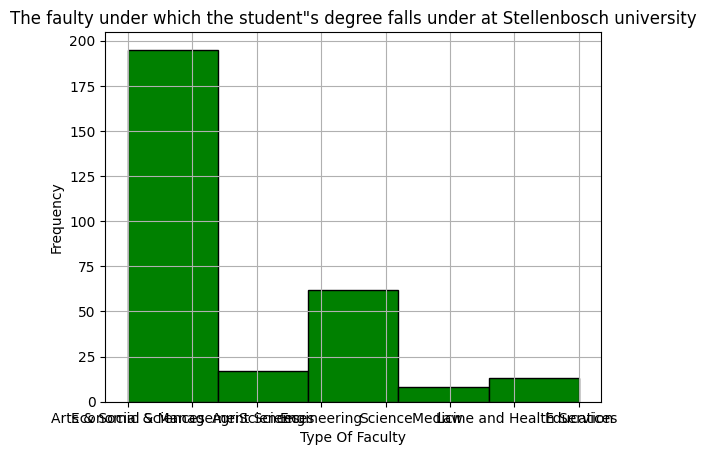

In [26]:
# Plot a histogram for the faulty under which the student's degree falls under at Stellenbosch university

plt.hist(data['What faculty does your degree fall under?'], bins=5, color='green', edgecolor='black')
plt.title('The faulty under which the student"s degree falls under at Stellenbosch university')
plt.xlabel('Type Of Faculty')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# The accommodation status of the student. Does the student stay in Stellenbosch university accommodation or private accommodation. (Binary)

In [27]:
data['Your Accommodation Status Last Year (2023)'].value_counts()

Your Accommodation Status Last Year (2023)
Private accommodation/ stay with family/friends    258
Non-private accommodation ie. Res                   37
Name: count, dtype: int64

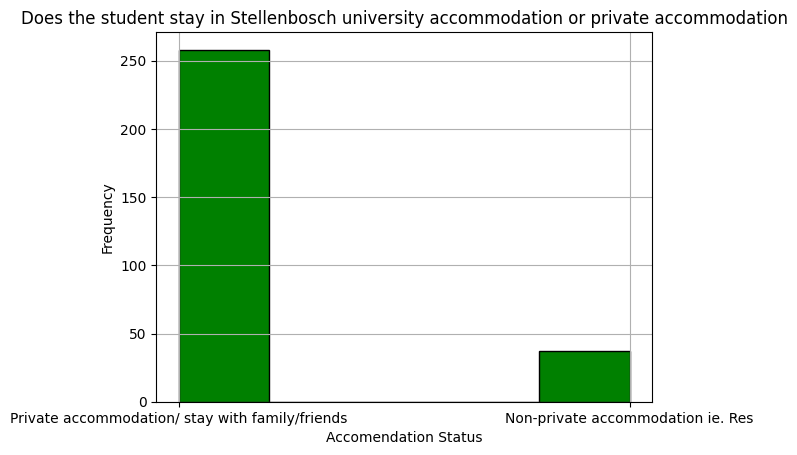

In [29]:
# Plot a histogram does the student stay in Stellenbosch university accommodation or private accommodation

plt.hist(data['Your Accommodation Status Last Year (2023)'], bins=5, color='green', edgecolor='black')
plt.title('Does the student stay in Stellenbosch university accommodation or private accommodation')
plt.xlabel('Accomendation Status')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# How much the student receives as a monthly allowance while in Stellenbosch (Categorical)

In [30]:
data['Monthly Allowance in 2023'].value_counts()

Monthly Allowance in 2023
R 4001- R 5000     119
R 5001 - R 6000     86
R 6001 - R 7000     43
R 8000+             24
R 7001 - R 8000     23
Name: count, dtype: int64

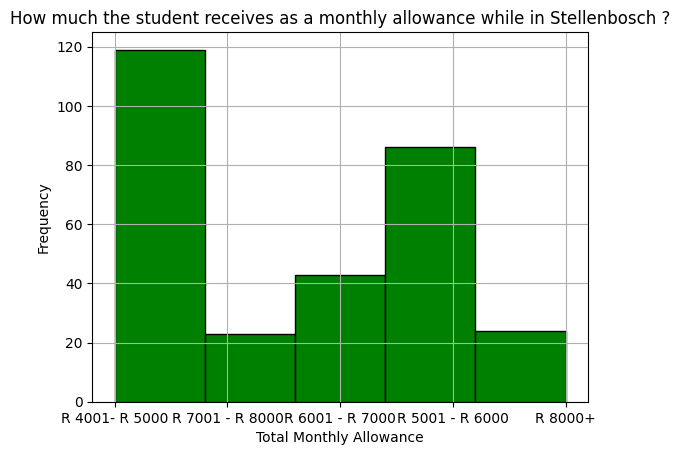

In [31]:
# Plot a histogram how much the student receives as a monthly allowance while in Stellenbosch

plt.hist(data['Monthly Allowance in 2023'], bins=5, color='green', edgecolor='black')
plt.title('How much the student receives as a monthly allowance while in Stellenbosch ?')
plt.xlabel('Total Monthly Allowance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Is the student on some kind of funding program or not. (Binary)

In [32]:
data['Were you on scholarship/bursary in 2023?'].value_counts()

Were you on scholarship/bursary in 2023?
No                     268
Yes (NSFAS, etc...)     27
Name: count, dtype: int64

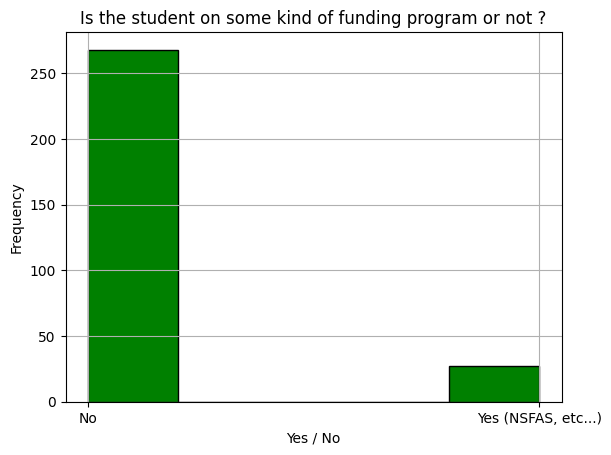

In [33]:
# Plot a histogram, is the student on some kind of funding program or not ?

plt.hist(data['Were you on scholarship/bursary in 2023?'], bins=5, color='green', edgecolor='black')
plt.title('Is the student on some kind of funding program or not ?')
plt.xlabel('Yes / No')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# The amount of time a student spends studying over and above their weekly lectures. (Numerical, discrete)

In [34]:
data['Additional amount of studying (in hrs) per week'].value_counts()

Additional amount of studying (in hrs) per week
8+     89
3-5    68
5-8    61
1-3    60
0      17
Name: count, dtype: int64

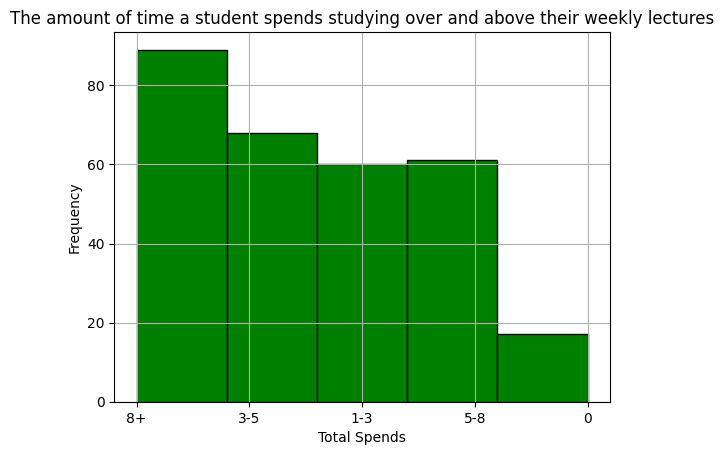

In [36]:
# Plot a histogram, The amount of time a student spends studying over and above their weekly lectures

plt.hist(data['Additional amount of studying (in hrs) per week'], bins=5, color='green', edgecolor='black')
plt.title('The amount of time a student spends studying over and above their weekly lectures')
plt.xlabel('Total Spends')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# How often the student goes out socializing with their friends. This could be clubbing, going for drinks, going out for dinner. (Numerical, discrete)

In [39]:
data['How often do you go out partying/socialising during the week? '].value_counts()

How often do you go out partying/socialising during the week? 
1                85
Only weekends    78
2                63
3                46
4+               13
0                10
Name: count, dtype: int64

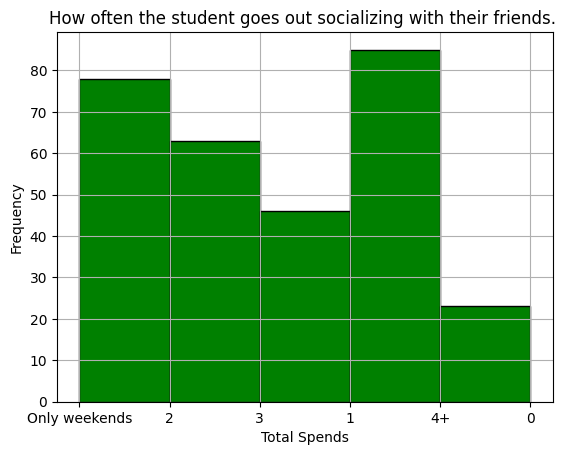

In [40]:
# Plot a histogram, How often the student goes out socializing with their friends ?

plt.hist(data['How often do you go out partying/socialising during the week? '], bins=5, color='green', edgecolor='black')
plt.title('How often the student goes out socializing with their friends. ')
plt.xlabel('Total Spends')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# When a student does go cubbing how many alcoholic drinks they consume while out. (Numerical, discrete)

In [41]:
data['How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'].value_counts()

How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)
0     147
1      58
2      51
4+     21
3      18
Name: count, dtype: int64

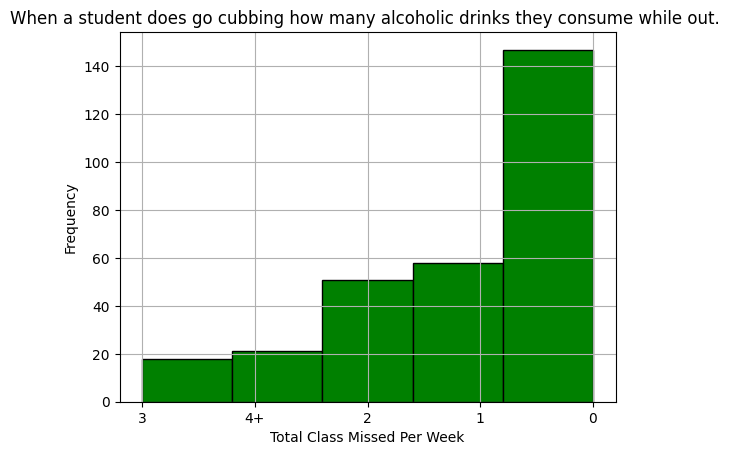

In [43]:
# Plot a histogram, When a student does go cubbing how many alcoholic drinks they consume while out ?

plt.hist(data['How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'], bins=5, color='green', edgecolor='black')
plt.title('When a student does go cubbing how many alcoholic drinks they consume while out. ')
plt.xlabel('Total Class Missed Per Week')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# How many classes the student misses per week based on reasons caused by alcohol. E.g. Hungover or tired. (Numerical, discrete)

In [44]:
data['On a night out, how many alcoholic drinks do you consume?'].value_counts()

On a night out, how many alcoholic drinks do you consume?
5-8    84
8+     66
1-3    66
3-5    65
0      14
Name: count, dtype: int64

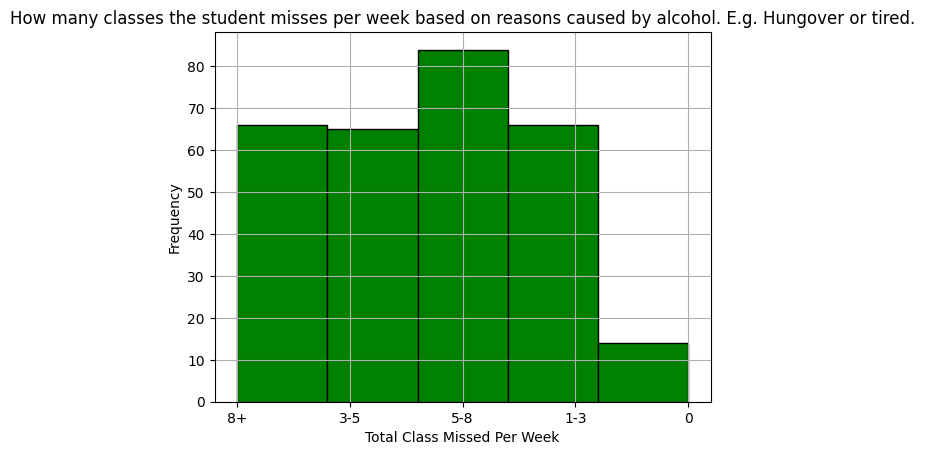

In [45]:
# Plot a histogram, How many classes the student misses per week based on reasons caused by alcohol. E.g. Hungover or tired.

plt.hist(data['On a night out, how many alcoholic drinks do you consume?'], bins=5, color='green', edgecolor='black')
plt.title('How many classes the student misses per week based on reasons caused by alcohol. E.g. Hungover or tired.')
plt.xlabel('Total Class Missed Per Week')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# How many modules the student has failed thus far into their studies. (Numerical, discrete)

In [46]:
data['How many modules have you failed thus far into your studies?'].value_counts()

How many modules have you failed thus far into your studies?
0     172
1      50
2      28
3      23
4+     22
Name: count, dtype: int64

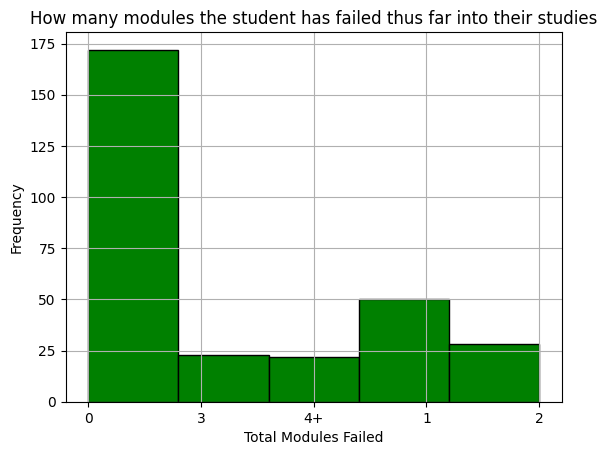

In [47]:
# Plot a histogram, How many modules the student has failed thus far into their studies

plt.hist(data['How many modules have you failed thus far into your studies?'], bins=5, color='green', edgecolor='black')
plt.title('How many modules the student has failed thus far into their studies')
plt.xlabel('Total Modules Failed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Is the student in a romantic relationship or not. (Binary)

In [49]:
data['Are you currently in a romantic relationship?'].value_counts()

Are you currently in a romantic relationship?
No     167
Yes    128
Name: count, dtype: int64

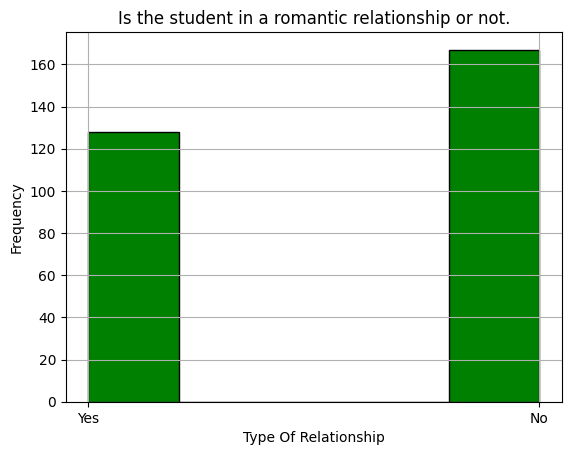

In [48]:
# Plot a histogram, Is the student in a romantic relationship or not.

plt.hist(data['Are you currently in a romantic relationship?'], bins=5, color='green', edgecolor='black')
plt.title('Is the student in a romantic relationship or not.')
plt.xlabel('Type Of Relationship')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Does the student's parent/s approve of alcohol consumption or not. (Binary)

In [51]:
parent_approval = data['Do your parents approve alcohol consumption?'].value_counts()
relationship_with_parents = data['How strong is your relationship with your parent/s?'].value_counts()
(parent_approval, relationship_with_parents)

(Do your parents approve alcohol consumption?
 Yes    260
 No      35
 Name: count, dtype: int64,
 How strong is your relationship with your parent/s?
 Very close    198
 Close          67
 Fair           28
 Distant         2
 Name: count, dtype: int64)

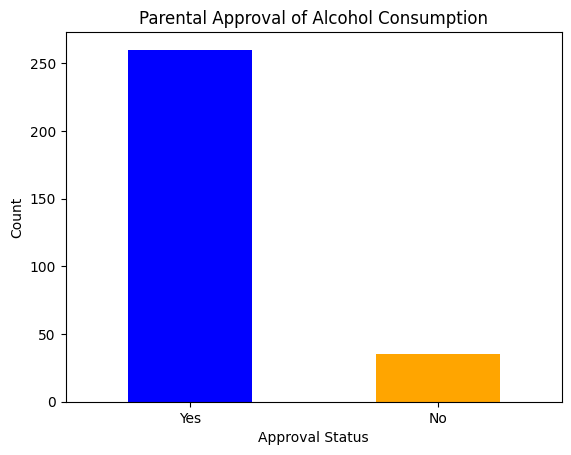

In [52]:
# Plot for Parental Approval of Alcohol Consumption
data['Do your parents approve alcohol consumption?'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Parental Approval of Alcohol Consumption')
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#  How close the student's relationship is with their parent/s. (Categorical)

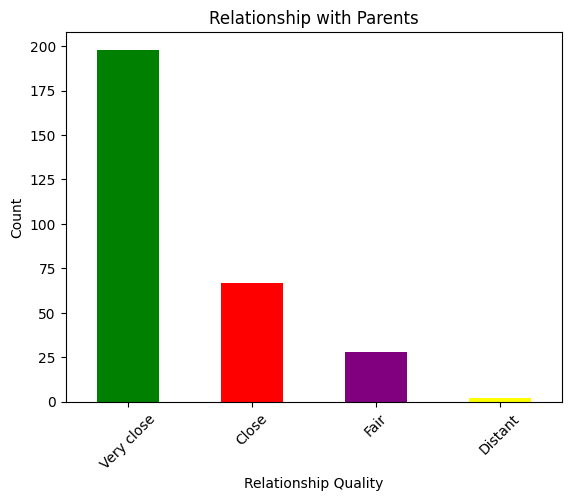

In [53]:
# Plot for Relationship with Parents

data['How strong is your relationship with your parent/s?'].value_counts().plot(kind='bar', color=['green', 'red', 'purple', 'yellow'])
plt.title('Relationship with Parents')
plt.xlabel('Relationship Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()